In [28]:
from collections import defaultdict
import matplotlib.pyplot as plt

In [9]:
dieSize = 6
dieNumber = 5
Hardness = 10

In [15]:
null_function = lambda: 0

class ProbabilityDistribution:
    def __init__(self):
        self.distribution = defaultdict(null_function)
        
    @staticmethod
    def flatDistribution(dieSize):
        result = ProbabilityDistribution()
        for face in range(1, dieSize + 1):
            result[face] = 1/dieSize
        return result
        
    def __getitem__(self, key: int):
        return self.distribution[key]
    
    def __setitem__(self, key: int, value: float):
        self.distribution[key] = value
        
    def items(self):
        return self.distribution.items()
        
    def normalize(self):
        total = sum(V for K, V in self.distribution.items())
        for K, V in self.distribution.items():
            self.distribution[K] = V / total
            
    def convolute(self, other: "ProbabilityDistribution"):
        result = ProbabilityDistribution()
        for K, V in self.distribution.items():
            for K2, V2 in other.distribution.items():
                result[K + K2] += V*V2
        return result
    
    def expectation(self):
        return sum(K*V for K, V in self.distribution.items())

In [6]:
baseDie = ProbabilityDistribution.flatDistribution(dieSize)

In [16]:
#Convolute many dice to get resulting distro
resultingDistribution = ProbabilityDistribution.flatDistribution(dieSize)
for die in range(dieNumber - 1):
    resultingDistribution = resultingDistribution.convolute(baseDie)

In [17]:
#Halve damage because energy damage is halved against objects
resultingDamageDistribution = ProbabilityDistribution()
for K, V in resultingDistribution.distribution.items():
    resultingDamageDistribution[K // 2] += V

In [18]:
#Substract hardness
damageAfterHardnessDistribution = ProbabilityDistribution()
for K, V in resultingDamageDistribution.distribution.items():
    damageAfterHardnessDistribution[max(K - Hardness, 0)] += V

In [22]:
print(damageAfterHardnessDistribution.expectation())
print(sum(V for K, V in damageAfterHardnessDistribution.distribution.items()))

0.229809670781893
0.9999999999999997


In [20]:
X = [X for X in range(1, 21)]
Y = []
resultingDistribution = ProbabilityDistribution.flatDistribution(dieSize)
for dieNumber in range(1, 21):
    resultingDamageDistribution = ProbabilityDistribution()
    for K, V in resultingDistribution.distribution.items():
        resultingDamageDistribution[max(K // 2 - Hardness, 0)] += V
    Y.append(resultingDamageDistribution.expectation())
    resultingDistribution = resultingDistribution.convolute(baseDie)

In [35]:
plt.rcParams['figure.figsize'] = [10, 10]
%matplotlib notebook

<IPython.core.display.Javascript object>


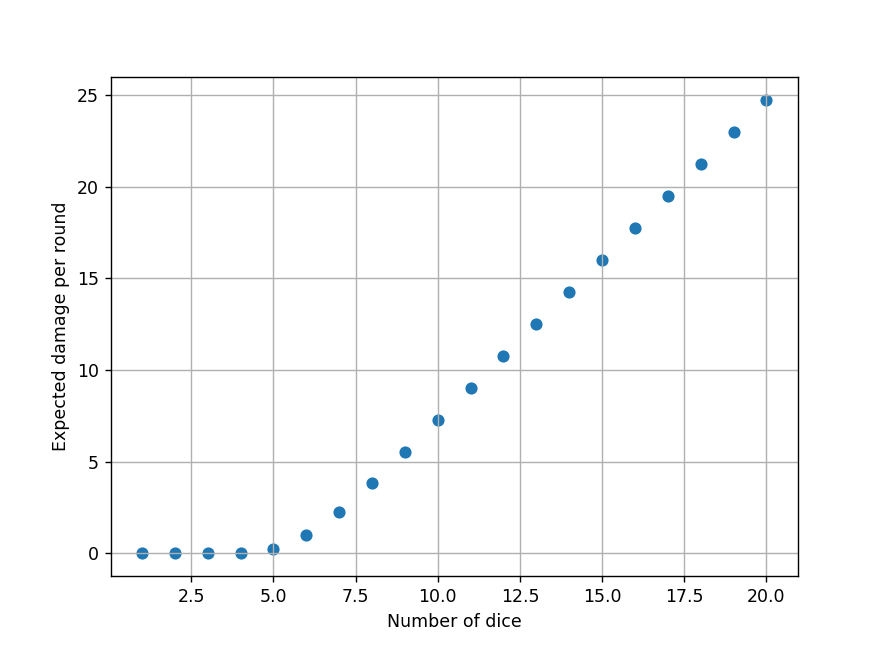

In [38]:
plt.figure()
plt.scatter(X, Y)
plt.xlabel("Number of dice")
plt.grid()
plt.ylabel("Expected damage per round")
plt.show()

<IPython.core.display.Javascript object>


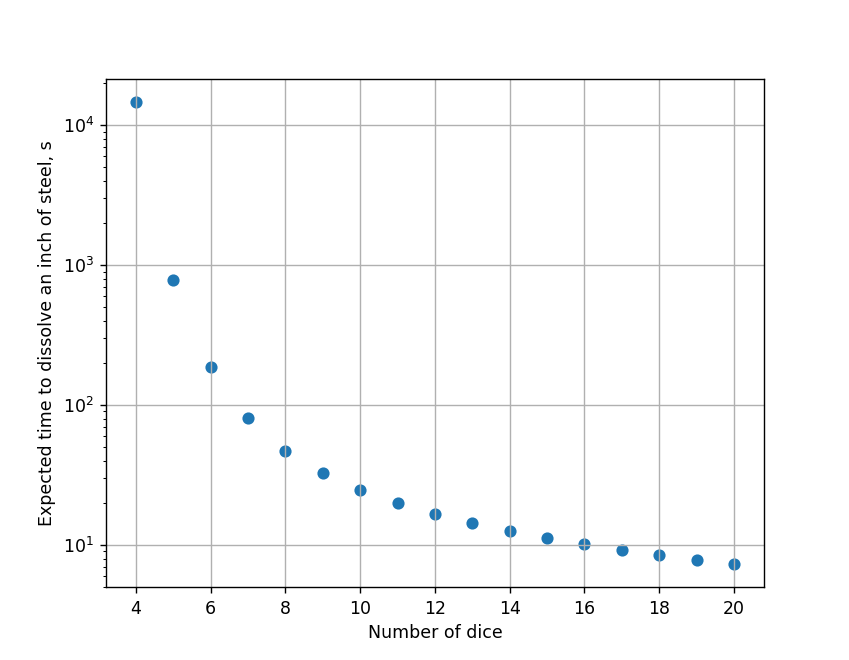

In [40]:
plt.figure()
secondsPerRound = 6
hpPerInchSteel = 30
diceForSteel = [x for x,y in zip(X,Y) if y>0]
timeToGoThroughSteel = [secondsPerRound*hpPerInchSteel/y for y in Y if y>0]
plt.scatter(diceForSteel, timeToGoThroughSteel)
plt.xlabel("Number of dice")
plt.grid()
plt.ylabel("Expected time to dissolve an inch of steel, s")
plt.yscale("log")
plt.show()